### COP Data analysis
This worksheet continues with the data prepared before (Database for it however is a bit bigger, than the amount of data provided here). Its main goal is to identify and sort out outliers from the recordings, average data among each subject (each mesearument was repeated 3 times in each condtion), perform some statistical evaluation, and build a chart which is also exported as an image into Charts folder. 

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

## 1. Load data

Data is stored in excel spreadsheet with two sheets. First page is analysis in anterior-posterior (AP) plane and second in medio-lateral (ML). Sometimes it happens that the measurement is wrong. When it happens all variables are extremelely high, thats why to exclude them its enought to check one variable and if it happens its neceassary to delete all row

/home/rafal/miniconda3/envs/forcePlate/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rafal/miniconda3/envs/forcePlate/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rafal/miniconda3/envs/forcePlate/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/rafal/miniconda3/envs/forcePlate/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 55.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/hom

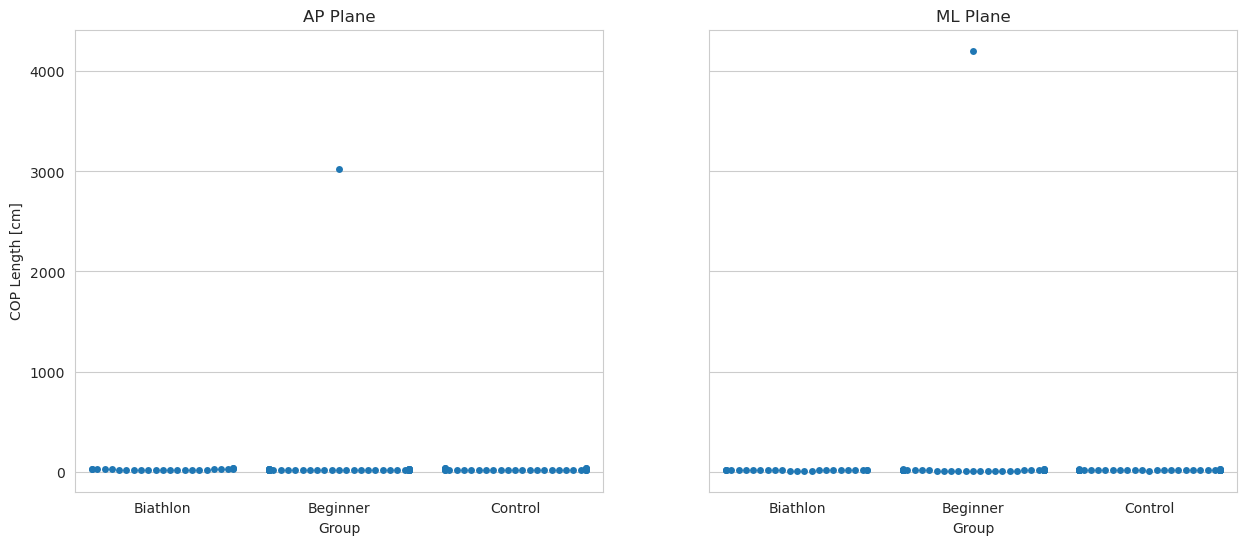

In [61]:
# File and sheet names
#! On Windows you need to replace all '/' with '\\'
filename= 'DataBase/COP_DB_Complete.xlsx'
exportPattern = 'DataBase/COP_DB_averaged.xlsx'
sheetnames= ['COP_AP', 'COP_ML']

# I want to compare same variables in both planes of movement so I open both
df_ap= pd.read_excel(filename, sheet_name=sheetnames[0])
df_ml= pd.read_excel(filename, sheet_name=sheetnames[1])

# Styling for charts
sns.set_style('whitegrid')

# Check if there are some outliers
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,6), sharey=True)

sns.swarmplot(data=df_ap, x='Group', y='lenCOP_SS', ax=ax0)
sns.swarmplot(data=df_ml, x='Group', y='lenCOP_SS', ax=ax1)

ax0.set(title='AP Plane', ylabel= 'COP Length [cm]')
ax1.set(title='ML Plane', ylabel='COP Length [cm]')

plt.show()

In [62]:
df_ap.columns

Index(['Subject', 'Group', 'raCOP_SS', 'stdCOP_SS', 'rmsCOP_SS', 'lenCOP_SS',
       'vCOP_SS', 'sampEN_SS', 'std_sampeEN_SS', 'raCOP_SZB', 'stdCOP_SZB',
       'rmsCOP_SZB', 'lenCOP_SZB', 'vCOP_SZB', 'sampEN_SZB', 'std_sampeEN_SZB',
       'raCOP_NC', 'stdCOP_NC', 'rmsCOP_NC', 'lenCOP_NC', 'vCOP_NC',
       'sampEN_NC', 'std_sampeEN_NC'],
      dtype='object')

## 2. Identify outliers and sort it out, then display the plot again

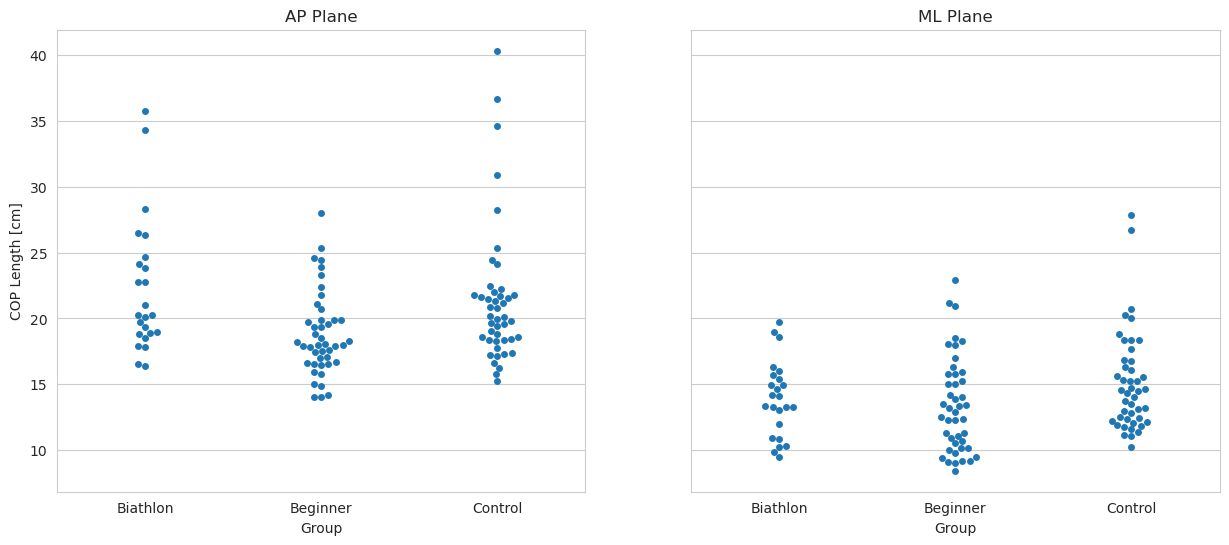

In [63]:
# Get outlier index and delete it
outlier_ap = df_ap.loc[df_ap['lenCOP_SS'] >= 100]
outlier_ml = df_ml.loc[df_ml['lenCOP_SS'] >= 100]

df_ap = df_ap.drop(outlier_ap.index)
df_ml = df_ml.drop(outlier_ml.index)


#Then display again
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15,6), sharey=True)

sns.swarmplot(data=df_ap, x='Group', y='lenCOP_SS', ax=ax0, order=['Biathlon', 'Beginner', 'Control'])
sns.swarmplot(data=df_ml, x='Group', y='lenCOP_SS', ax=ax1, order=['Biathlon', 'Beginner', 'Control'])

ax0.set(title='AP Plane', ylabel= 'COP Length [cm]')
ax1.set(title='ML Plane', ylabel='COP Length [cm]')

plt.show()

## ECDFs

In [64]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements"""
    # Number od data points: 
    n= len(data)
    
    # x-data for ECDF
    x= np.sort(data)
    
    # y-data for ECDF:
    y= np.arange(1,n+1) / n
    
    return x,y

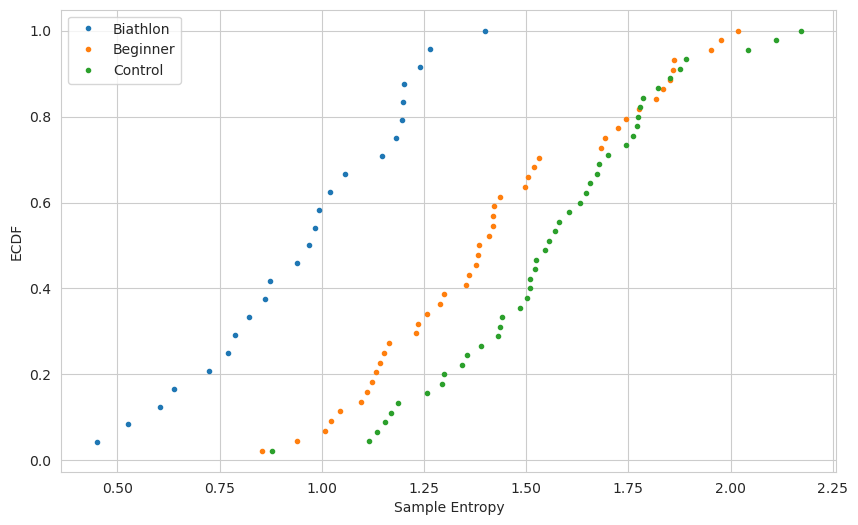

In [65]:
biathlon= df_ap[df_ap['Group']== 'Biathlon'].sampEN_NC
beginners= df_ap[df_ap['Group']== 'Beginner'].sampEN_NC
control= df_ap[df_ap['Group']=='Control'].sampEN_NC

fig = plt.figure(figsize=(10,6))


x_biat, y_biat= ecdf(biathlon)
x_beg, y_beg= ecdf(beginners)
x_cont, y_cont= ecdf(control)

plt.plot(x_biat, y_biat, marker='.', linestyle='none')
plt.plot(x_beg, y_beg, marker='.', linestyle='none')
plt.plot(x_cont, y_cont, marker='.', linestyle='none')

plt.xlabel('Sample Entropy')
plt.ylabel('ECDF')
plt.legend(['Biathlon', 'Beginner', 'Control'])

## 3. Averaging data

All measurements were taken three times. Before statistical analysis data should be averaged for each person. Each person is identified in column 'Subject' consisting of subject's and measurement's number. In case its needed later excel file with data averaged across subjects is exported

In [66]:
df_ap.groupby(by=["Subject", "Group"])

In [67]:
# For further analysis only averaged data for each subject is taken
df2_ap= df_ap.groupby(['Subject', 'Group'], as_index=False).mean().sort_values(by=['Group', "Subject" ])
df2_ml= df_ml.groupby(['Subject', 'Group'], as_index=False).mean().sort_values(by=['Group', "Subject" ])

In [68]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(exportPattern, engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df2_ap.to_excel(writer, sheet_name='COP_AP', index=False)
df2_ml.to_excel(writer, sheet_name='COP_ML', index=False)

# Close the Pandas Excel writer and output the Excel file.
writer.close()

## Bootstrap data - pobability of difference

In [69]:
def permutation_Test (group1, group2, n) :
    """"Permutation test for A/B hypothesis testing"""
    
    # Differences between means of sampled groups
    meanDiffs = np.empty(n)
    
    # Combine samples
    combined= np.concatenate((group1, group2))
    
    # Repeat next steps desired amount of times
    for i in range(n):
        # Shuffle combined sample
        shuffled= np.random.permutation(combined)
        # Randomly draw sample of the same size as group A, 
        # and remaining data to group B for n repetitions
        groupA= np.random.choice(shuffled, size=len(group1), replace=False)
        drawRes= np.isin(shuffled, groupA)
        groupB= shuffled[~drawRes]
        # Add difference between means of samples to the array
        meanDiffs[i]= np.mean(groupA)-np.mean(groupB)
        
    return meanDiffs

# Plotting of resulting distribution
def plot_distribution(meanDiffs, observed_diff, n_bins, axes):
    axes.hist(meanDiffs, bins=n_bins)
    axes.axvline(observed_diff, color='r')
    axes.set_xlabel('Distribution of means diff. Red line marks observed difference')
    axes.set_ylabel('Frequency')
    axes.set_title('p value = ' + str(np.mean(meanDiffs<observed_diff)))

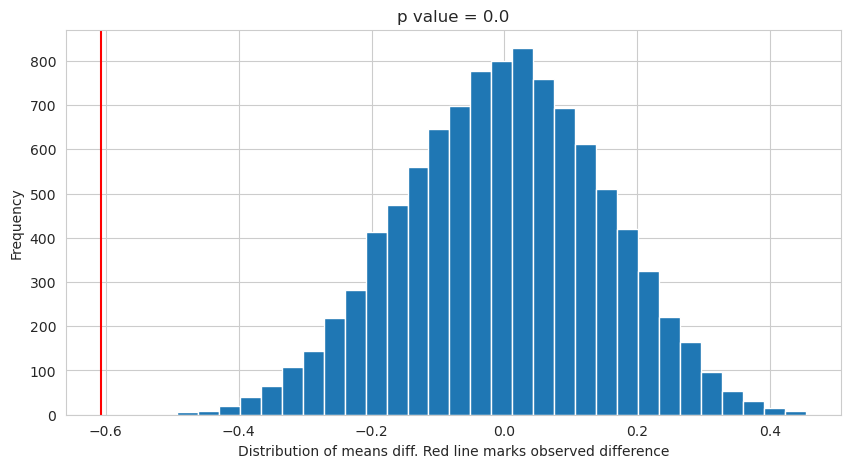

In [70]:
# Selecting groups to compare
group1= df2_ap[df2_ap['Group']== 'Biathlon'].sampEN_NC
group2= df2_ap[df2_ap['Group']=='Control'].sampEN_NC

# Calculating means of groups and difference between them
samp_means= df2_ap.groupby('Group').sampEN_NC.mean()
mean_diff_obs=samp_means.loc['Biathlon']- samp_means.loc['Control']

# Implementing permutation test
meanDiff = permutation_Test(group1, group2, 10000)

# Plotting result
fig, ax= plt.subplots(figsize=(10,5))
plot_distribution(meanDiff, mean_diff_obs, 30, ax)

##  4. Preparing data for plotting

My idea for plot is to show how measured variables change depending on experimental condition (quiet standing, shooting position, aiming target), and between each group. Ideally on one graph to be able to see all dependencies. Since there is only one grouping variable (group) its necessary to melt data and create other one with measurement condition. I want to visualise on one set of plots lenghts and velocities measured for same variable (for now, later AP, ML)

In [71]:
# Creating 2 data frames containing only data to be transformed (same variable in both planes)
df_var_ap = df2_ap[['Subject', 'Group', 'sampEN_SS', 'sampEN_SZB', 'sampEN_NC']]
df_var_ml = df2_ml[['Subject', 'Group', 'sampEN_SS', 'sampEN_SZB', 'sampEN_NC']]

# Since naming of variables is not what I want on labels I will change column names before melting
df_var_ap.columns = ['Subject', 'Group', 'Quiet Standing', 'Shooting position', 'Aiming target']
df_var_ml.columns = ['Subject', 'Group', 'Quiet Standing', 'Shooting position', 'Aiming target']

# Now column names do not inform about variable, but condition it was taken in. Variable name will be displayed as a title
df_var_ap_melt = df_var_ap.melt(id_vars= ['Subject', 'Group'], var_name='Condition')
df_var_ml_melt = df_var_ml.melt(id_vars= ['Subject', 'Group'], var_name= 'Condition')

## 5. Plotting data 

At this point only barplots will be used and styled with help of matplotlib

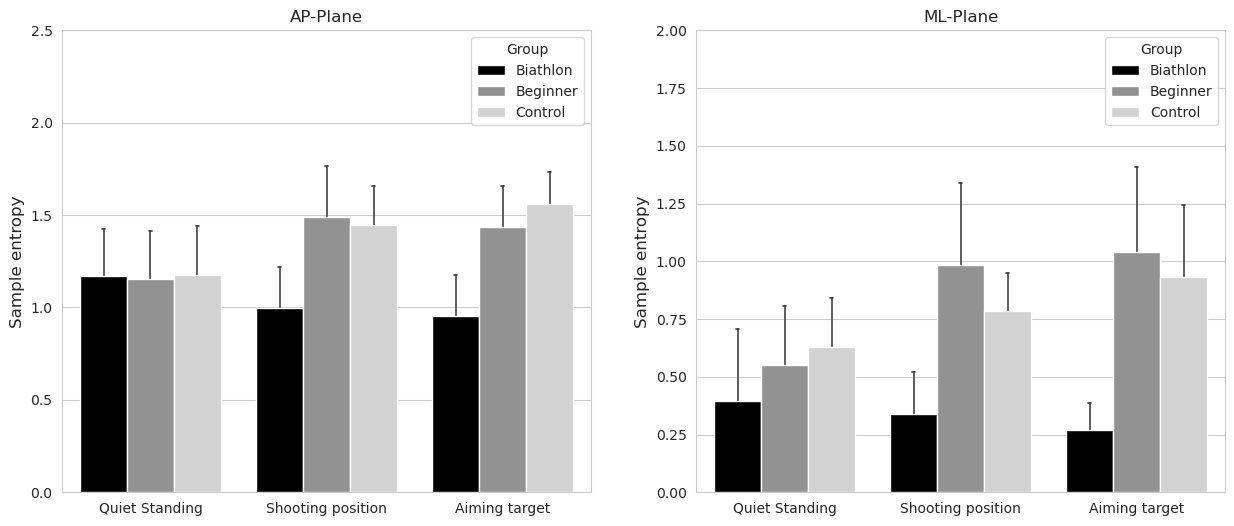

In [72]:
colors = ['#000000', '#929292', '#d2d2d2']
order = ['Biathlon', 'Beginner', 'Control']

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

plt1 = sns.barplot(data=df_var_ap_melt, x='Condition', y='value', hue='Group', ax=ax0, errorbar='sd', 
                   hue_order=order, palette=colors,  err_kws={'linewidth': 1.2}, capsize=0.05, zorder=5)
plt2 = sns.barplot(data=df_var_ml_melt, x='Condition', y='value', hue='Group', ax=ax1, errorbar='sd',
                   hue_order=order, palette=colors, err_kws={'linewidth': 1.2}, capsize=0.05, zorder=5)

ax0.set(xlabel= None, title = 'AP-Plane', ylim=[0,2.5])
ax1.set(xlabel= None, title = 'ML-Plane', ylim=[0,2])


ax0.set_ylabel('Sample entropy', fontsize=12)
ax1.set_ylabel('Sample entropy', fontsize=12)


plt.show()

In [73]:
# Save figure
#! On Windows you need to replace all '/' with '\\'
fig.savefig('Charts/sampEn.png')